In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
covid_cases_path = "input_data/Covid_cases.csv"
city_crime_path = "input_data/city_crime.csv"

# Read the mouse data and the study results
covid_cases_df = pd.read_csv(covid_cases_path)
city_crime_df = pd.read_csv(city_crime_path)

#print data headers
covid_cases_df.head()


,Month,City,Cum_Open_Case
0,Jan-19,Denver,0
1,Feb-19,Denver,0
2,Mar-19,Denver,0
3,Apr-19,Denver,0
4,May-19,Denver,0


In [3]:
# print data headers for city crime
city_crime_df.head()


,Month,City,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
0,Jan-19,Philadelphia,9023,2995,NaN,NaN
1,Feb-19,Philadelphia,8056,2819,NaN,NaN
2,Mar-19,Philadelphia,8926,3269,NaN,NaN
3,Apr-19,Philadelphia,9799,3530,NaN,NaN
4,May-19,Philadelphia,10676,3782,NaN,NaN


In [4]:
# Philadelphia
phily_df = city_crime_df.loc[city_crime_df["City"]=="Philadelphia"]
phily_df

,Month,City,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
0,Jan-19,Philadelphia,9023,2995,NaN,NaN
1,Feb-19,Philadelphia,8056,2819,NaN,NaN
2,Mar-19,Philadelphia,8926,3269,NaN,NaN
3,Apr-19,Philadelphia,9799,3530,NaN,NaN
4,May-19,Philadelphia,10676,3782,NaN,NaN
5,Jun-19,Philadelphia,10993,3475,NaN,NaN
6,Jul-19,Philadelphia,11700,3465,NaN,NaN
7,Aug-19,Philadelphia,11464,3498,NaN,NaN
8,Sep-19,Philadelphia,11003,3613,NaN,NaN
9,Oct-19,Philadelphia,10559,3912,NaN,NaN


In [ ]:
#pd.DataFrame(city_crime_df.groupby(['Month', 'Year']))

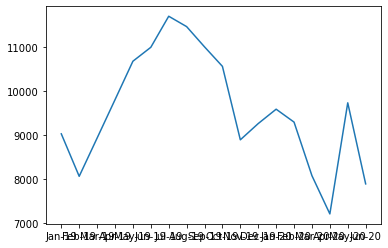

In [5]:
# Plot two variables
plt.plot(phily_df['Month'], phily_df['Non-Violent'])



([<matplotlib.patches.Wedge at 0x14a40ef7080>,
 [Text(0.7601294979115137, 0.7951120338699385, 'Violent'),
  Text(-0.7601294979115137, -0.7951120338699385, 'Non-Violent')],
 [Text(0.41461608976991654, 0.43369747301996636, '25.7%'),
  Text(-0.41461608976991654, -0.43369747301996636, '74.3%')])

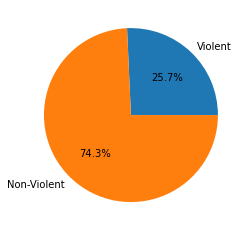

In [9]:
# Plot pie graph for Philadelphia
violent_count = phily_df['Violent'].sum()
non_violent_count = phily_df['Non-Violent'].sum()
phily_crime_type = [violent_count,non_violent_count]
labels = ["Violent", "Non-Violent"]
plt.pie(phily_crime_type,labels=labels,autopct='%1.1f%%')


In [10]:
print(non_violent_count)
print(violent_count)

172100
59578


In [11]:
# Merge data inner on Month
merged_df = pd.merge(covid_cases_df, city_crime_df)
merged_df

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
0,Jan-19,Denver,0,6935,630,NaN,NaN
1,Feb-19,Denver,0,6076,499,NaN,NaN
2,Mar-19,Denver,0,6473,585,NaN,NaN
3,Apr-19,Denver,0,6558,656,NaN,NaN
4,May-19,Denver,0,6840,710,NaN,NaN
...,...,...,...,...,...,...,...
103,Feb-20,Seattle,5,4337,964,0.150093,0.072303
104,Mar-20,Seattle,23455,5544,997,0.183351,-0.105027
105,Apr-20,Seattle,138708,5166,941,0.090564,-0.123836
106,May-20,Seattle,228112,10521,1036,1.306731,-0.142384


In [12]:
merged_df_phily = merged_df.loc[merged_df["City"]=="Philadelphia"]
merged_df_phily

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
54,Jan-19,Philadelphia,0,9023,2995,NaN,NaN
55,Feb-19,Philadelphia,0,8056,2819,NaN,NaN
56,Mar-19,Philadelphia,0,8926,3269,NaN,NaN
57,Apr-19,Philadelphia,0,9799,3530,NaN,NaN
58,May-19,Philadelphia,0,10676,3782,NaN,NaN
59,Jun-19,Philadelphia,0,10993,3475,NaN,NaN
60,Jul-19,Philadelphia,0,11700,3465,NaN,NaN
61,Aug-19,Philadelphia,0,11464,3498,NaN,NaN
62,Sep-19,Philadelphia,0,11003,3613,NaN,NaN
63,Oct-19,Philadelphia,0,10559,3912,NaN,NaN


In [16]:
merged_df_phily.dropna(how="any")


,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
66,Jan-20,Philadelphia,0,9584,3477,0.062174,0.160935
67,Feb-20,Philadelphia,0,9290,3404,0.153178,0.207520
68,Mar-20,Philadelphia,5743,8070,3139,-0.095900,-0.039768
69,Apr-20,Philadelphia,235027,7200,2432,-0.265231,-0.311048
70,May-20,Philadelphia,599386,9729,3106,-0.088704,-0.178741
71,Jun-20,Philadelphia,734803,7884,3276,-0.282816,-0.057266


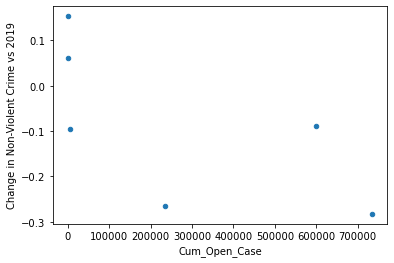

In [17]:
merged_df_phily.plot(kind="scatter", x="Cum_Open_Case", y="Change in Non-Violent Crime vs 2019")

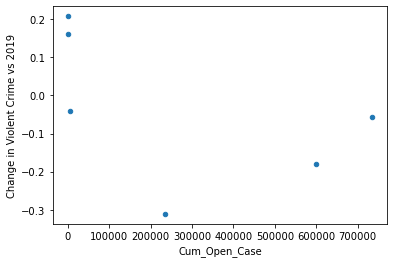

In [18]:
merged_df_phily.plot(kind="scatter", x="Cum_Open_Case", y="Change in Violent Crime vs 2019")